In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Introduction

This notebook demonstrates the use of calculating a metric for outlier rejection in streamlines. The details can be found in this manuscript (Jordan et al 2017) https://onlinelibrary.wiley.com/doi/abs/10.1111/jon.12467

In [2]:
import nibabel as nib
import seaborn as sns
from IPython.display import Image

# Not sure why but get AttributeError: module 'dipy.tracking' has no attribute 'utils' 
# unless something is imported from dipy.tracking.streamlines first
from dipy.tracking.streamline import set_number_of_points
from dipy.tracking.utils import calculate_cci # New feature in PR

from dipy.viz import actor, window

In [3]:
mytrk, myhdr = nib.trackvis.read('/Users/kesshijordan/Desktop/IU_Bloomington/qb_templates/Arcuate_template.trk')
mysls = [item[0] for item in mytrk]

In [4]:
mycci = calculate_cci(mysls)

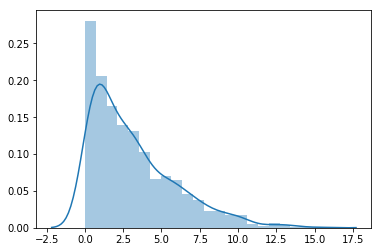

In [5]:
sns.distplot(mycci)

In [6]:
def showsls(sls, sl_value_vector=None, out_path='temp_cci.png'):
    
    renderer = window.Renderer()
    
    if sl_value_vector is not None:

        hue = [0.5, 1]
        saturation = [0.0, 1.0]

        lut_cmap = actor.colormap_lookup_table(
            scale_range=(sl_value_vector.min(), sl_value_vector.max()/4),
            hue_range=hue,
            saturation_range=saturation)

        bar3 = actor.scalar_bar(lut_cmap)
        renderer.add(bar3)

        stream_actor = actor.line(sls, sl_value_vector, linewidth=0.1,
                                   lookup_colormap=lut_cmap)
    else:
        stream_actor = actor.line(sls, linewidth=0.1)
    

    renderer.add(stream_actor)
    

    window.show(renderer, size=(600, 600), reset_camera=False)
    window.record(renderer, out_path=out_path, size=(600, 600))
    return out_path

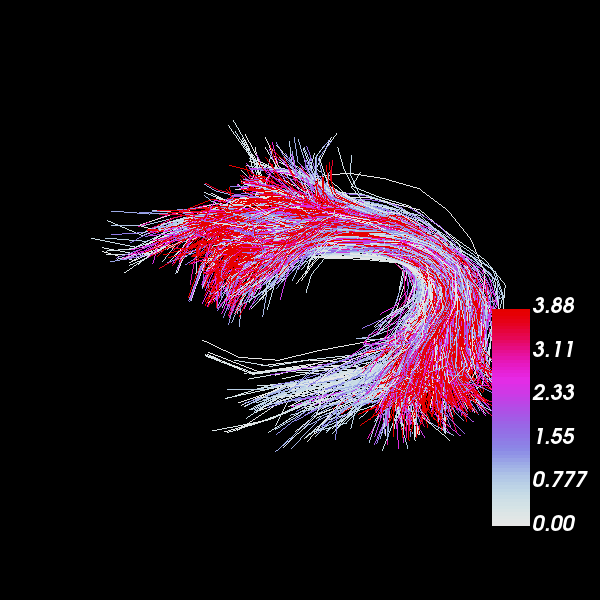

In [8]:
Image(showsls(mysls, mycci))

## Filter bundle to remove any streamlines with low cci (outliers)

In [9]:
def filter_cci(sls, cci_vector, thr=1):
    new_sls = []
    for i, sl in enumerate(sls):
        if cci_vector[i]>thr:
            new_sls.append(sl)
    return new_sls

In [10]:
filtered_sls = filter_cci(mysls, mycci)

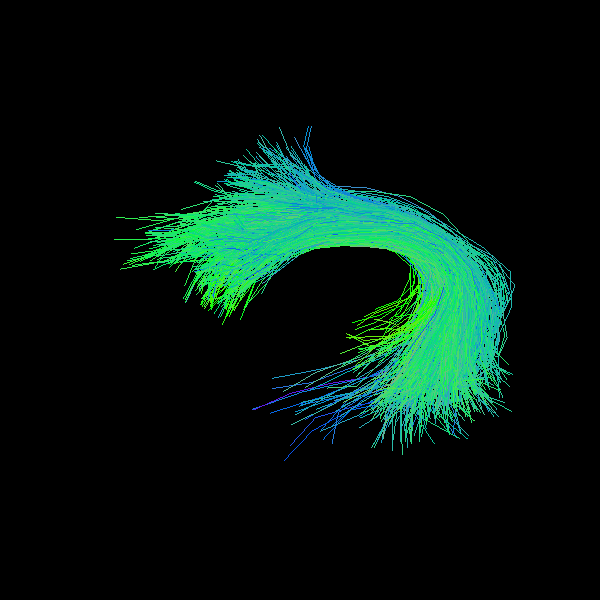

In [11]:
Image(showsls(filtered_sls))